Determine which player from a specific club committed the most fouls.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)


In [103]:
df_games_events = pd.read_csv('AssignmentData/game_events.csv')
df_players = pd.read_csv('AssignmentData/players.csv')
df_club = pd.read_csv('AssignmentData/clubs.csv')

### Data Cleaning for club

In [104]:
df_club

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-98/startseite/verein/105
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinburg/startseite/verein/11127
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istanbul/startseite/verein/114
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startseite/verein/12
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hotspur/startseite/verein/148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenenses/startseite/verein/68608
422,724,fc-volendam,Football Club Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/startseite/verein/724
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-bergamo/startseite/verein/800
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/startseite/verein/979


In [105]:
df_club.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'url'],
      dtype='object')

In [138]:
df_club = df_club[
['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name','last_season']
]

### Data Cleaning for players

In [139]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,NaN,IT1,Udinese Calcio


In [140]:
df_players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [141]:
df_players = df_players[
['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm',
       'current_club_domestic_competition_id',
       'current_club_name']
]

### Data Cleaning for game events

In [142]:
# Function to clean the string
def clean_string(text):
    # Convert to string if it's not already
    if isinstance(text, str):
        # Remove leading and trailing commas
        text = text.strip(',')

        # Remove all numbers
        text = ''.join(filter(lambda x: not x.isdigit(), text))

        # Remove dots and colons
        text = text.replace('.', '').replace(':', '')

        # Remove all whitespace
        text = text.replace(' ', '')

        return text
    else:
        return str(text)  # Convert non-string to string (handles NaN)

# Apply cleaning function to description column
df_games_events['cleaned_description'] = df_games_events['description'].apply(clean_string)

# Print all content in the 'description' column without truncation
pd.set_option('display.max_colwidth', None)

# Create a 'foul' column with a default value of False.
df_games_events['isFoul'] = False

# Filter rows where 'cleaned_description' contains 'foul' and update 'isFoul' accordingly
filtered_df = df_games_events[df_games_events['cleaned_description'].str.contains('foul', na=False)]

# df_games_events.pop('description')

if not filtered_df.empty:
    df_games_events.loc[filtered_df.index, 'isFoul'] = True
    
# filtered_df['foul'] = df_games_events.get('foul', False)
df_games_events.loc[df_games_events['isFoul'] == True]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul
182,66669735ca672692b2fef163bf54c0d4,2012-08-19,2221754,22,Cards,48,126414,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
215,5d52467708d6c25d619b6198c1b3681f,2012-08-19,2221757,-1,Cards,10,77879,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
317,53a565c73dc3371f12e8368e2b1a90e7,2012-08-19,2221765,19,Cards,24,45672,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
345,3467cb12295a6033cce88dc321a0dce9,2012-08-18,2221768,14,Cards,8,505,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
434,62e076ae0fd417f6ecca7b07a3d02f22,2012-08-19,2221774,48,Cards,72,47474,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
...,...,...,...,...,...,...,...,...,...,...,...,...
665501,715e4a4f3e8441128d2f8b0b879d0464,2023-11-04,4219014,18,Cards,1211,321416,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666099,48c730c258700e01f4b89196b2839574,2023-11-29,4222126,40,Cards,232,461512,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666131,657846a0f91dc84a28b8b9fbd7c2996a,2023-11-29,4222128,70,Cards,121,354145,"Second yellow , Serious foul",NaN,NaN,"Secondyellow,Seriousfoul",True
666355,bdee4adc2ca36b8f40ff85841c6cd790,2023-11-26,4225546,90,Cards,49702,404912,"1. Yellow card , Tactical foul",NaN,NaN,"Yellowcard,Tacticalfoul",True


### Get players of a specific club

In [111]:
club_id = 3060
selected_club = df_club[df_club['club_id'] == club_id]
club_last_season = selected_club.iloc[0]['last_season']

# Get players of a specific club
df_club_players = df_players[(df_players['current_club_id'] == club_id)  & (df_players['last_season'] == club_last_season)]

### Merge club players with game events to anylized the quantity of fouls commited by a specific club

In [112]:
merged_df = pd.merge(df_games_events, df_club_players, on='player_id', how='inner')
pd.set_option('display.max_columns', None)

### Data Cleaning for merged_df

In [143]:
merged_df

,game_event_id,date,game_id,minute,type,club_id,player_id,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,sub_position,position,current_club_domestic_competition_id,current_club_name
0,93e921472b9f6b52daec53b3194d7d9f,2012-08-18,2224762,57,Cards,498,110668,NaN,NaN,Yellowcard,False,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
1,48e2c72a32d714c956e8b6f9727dde9a,2012-10-06,2224795,80,Cards,498,110668,NaN,NaN,Yellowcard,False,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
2,f6dcf33b8f2179a535473089d727c383,2012-10-20,2224800,78,Substitutions,498,110668,39825.0,NaN,Notreported,False,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
3,81cd63da6c01f52635ad6fa6938dd554,2012-11-18,2224811,79,Cards,498,110668,NaN,NaN,Yellowcard,False,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
4,ec03f380439a63601fd06b7bdacbfc55,2012-11-24,2224828,81,Cards,498,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,33b92a18dbae8fd596e465ee96c5daaa,2023-09-28,4150515,33,Cards,3060,598153,NaN,NaN,Yellowcard,False,Dimitrios,Tsakmakis,Dimitrios Tsakmakis,2023,3060,dimitrios-tsakmakis,Greece,Thessaloniki,Greece,Centre-Back,Defender,GR1,Atromitos Athens
487,64c37b9fd3d22a7801ca170d15f5fdb5,2023-08-27,4150546,59,Substitutions,3060,598153,623072.0,NaN,Injury,False,Dimitrios,Tsakmakis,Dimitrios Tsakmakis,2023,3060,dimitrios-tsakmakis,Greece,Thessaloniki,Greece,Centre-Back,Defender,GR1,Atromitos Athens
488,7cb7049176190da36a908d6462759e8a,2023-11-05,4150557,61,Cards,3060,598153,NaN,NaN,"Yellowcard,Foul",False,Dimitrios,Tsakmakis,Dimitrios Tsakmakis,2023,3060,dimitrios-tsakmakis,Greece,Thessaloniki,Greece,Centre-Back,Defender,GR1,Atromitos Athens
489,20a9ad909f9e423f4a48636f8dc5cb7c,2023-08-27,4150546,49,Cards,3060,164729,NaN,NaN,"Yellowcard,Dissent",False,Panagiotis,Tsintotas,Panagiotis Tsintotas,2023,3060,panagiotis-tsintotas,Greece,Katerini,Greece,Goalkeeper,Goalkeeper,GR1,Atromitos Athens


In [144]:
merged_df.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id', 'cleaned_description',
       'isFoul', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'sub_position', 'position',
       'current_club_domestic_competition_id', 'current_club_name'],
      dtype='object')

In [145]:
merged_df = merged_df[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'current_club_domestic_competition_id',
       'current_club_name']
]

In [146]:
merged_df[merged_df['isFoul'] == True]

,game_event_id,date,game_id,minute,type,club_id,player_id,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,sub_position,position,current_club_domestic_competition_id,current_club_name
4,ec03f380439a63601fd06b7bdacbfc55,2012-11-24,2224828,81,Cards,498,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
8,9b8577b76370c36475a65162e0356f79,2013-02-03,2224914,56,Cards,2282,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
10,94b0baec23dae7cf6ad7715114bcab2c,2013-08-17,2329695,76,Cards,2282,110668,NaN,NaN,"Redcard,Seriousfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
32,236b8798dd8cc25c5f8f02459f8ff398,2023-09-01,4150482,36,Cards,3060,110668,NaN,NaN,"Redcard,Professionalfoul",True,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,Left-Back,Defender,GR1,Atromitos Athens
474,6a682f979b1dfd042f0b3089e0171344,2023-10-08,4150610,45,Cards,3060,284306,NaN,NaN,"Redcard,Professionalfoul",True,Lucas,Acevedo,Lucas Acevedo,2023,3060,lucas-acevedo,Argentina,Justiciano Posse,Argentina,Centre-Back,Defender,GR1,Atromitos Athens


In [147]:
# Check if every player in merged_df has isFoul field equal to True
all_fouls_true = merged_df['isFoul'].all()

# Count the total amount of isFoul field equal to True
total_fouls = merged_df['isFoul'].sum()

# Print the results
print(f"All players have committed at least one foul: {all_fouls_true}")
print(f"Total amount of fouls: {total_fouls}")


All players have committed at least one foul: False
Total amount of fouls: 5


In [148]:
# Filter merged_df to include only rows where isFoul is True
fouls_df = merged_df[merged_df['isFoul'] == True]

# Group by player_id and count the number of fouls for each player
fouls_count = fouls_df.groupby('player_id').size().reset_index(name='foul_count')

# Merge with df_players to get player names
fouls_count = fouls_count.merge(df_players[['player_id', 'name']], on='player_id', how='left')

# Identify the player with the maximum number of fouls
player_most_fouls = fouls_count.loc[fouls_count['foul_count'].idxmax()]

# Get the player details
player_details = merged_df[merged_df['player_id'] == player_most_fouls['player_id']].iloc[0]

# Print the player with the most fouls and the number of fouls
print(f"Player with the most fouls: {player_details['player_id']} ({player_details['name']})")
print(f"Number of fouls: {player_most_fouls['foul_count']}")


Player with the most fouls: 110668 (Laurens De Bock)
Number of fouls: 4


### Visualizing fouls detailes in a pie chart

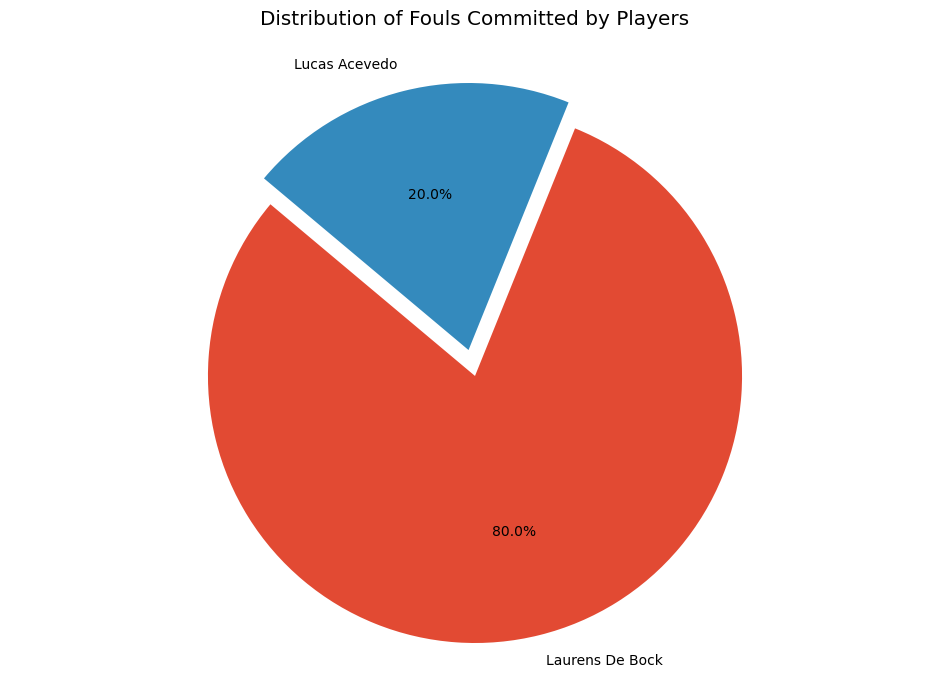

In [149]:
# Generate the pie chart
labels = fouls_count['name']
sizes = fouls_count['foul_count']
explode = [0.1 if player_id == player_most_fouls['player_id'] else 0 for player_id in fouls_count['player_id']]

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Highlight the player with the most fouls
plt.title('Distribution of Fouls Committed by Players\n')
plt.show()

### Visualizing fouls detailes in a Bar graph

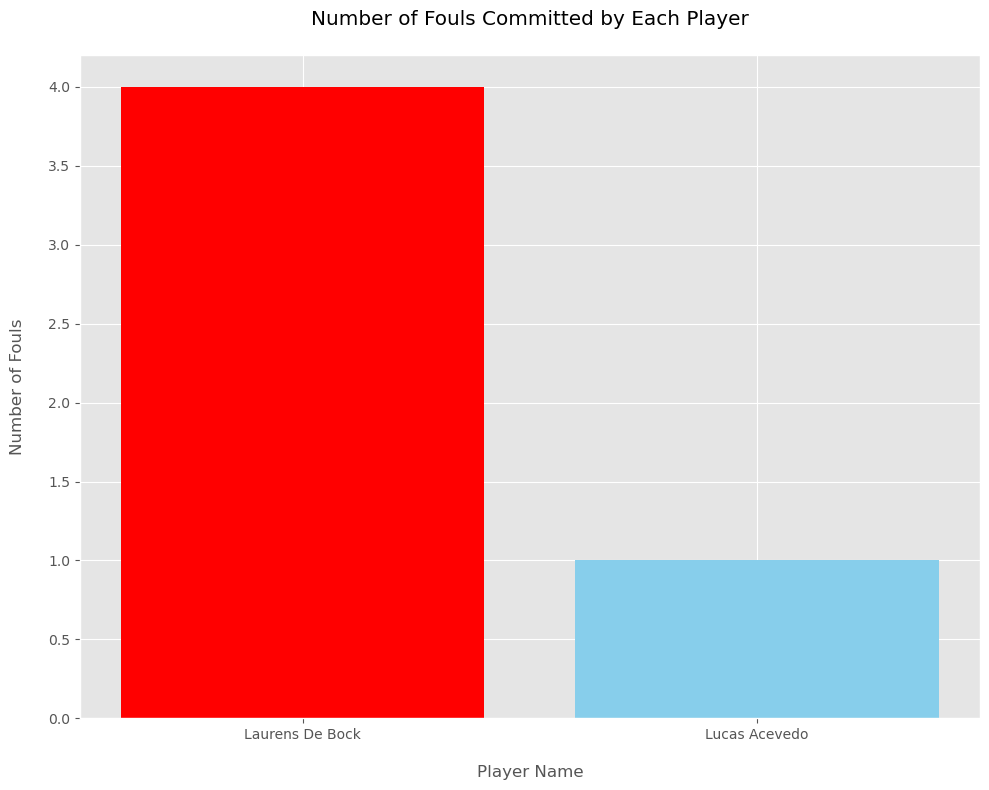

In [150]:
# Generate the bar graph
plt.figure(figsize=(10, 8))
plt.bar(fouls_count['name'], fouls_count['foul_count'], color='skyblue')
plt.xlabel('\nPlayer Name')
plt.ylabel('Number of Fouls\n')
plt.title('Number of Fouls Committed by Each Player\n')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to ensure labels fit

# Highlight the player with the most fouls
highlight_color = ['red' if player_id == player_most_fouls['player_id'] else 'skyblue' for player_id in fouls_count['player_id']]
plt.bar(fouls_count['name'], fouls_count['foul_count'], color=highlight_color)

# Show the plot
plt.show()